### Import the Libraries

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

### Create the image data generator object to read images

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

### Read the image

In [15]:
# multiclass change class_mode='binary'->'categorical' 
# And also change the no of neurons in last layer
train=train_datagen.flow_from_directory('imagenet1/train',class_mode='categorical',batch_size=32,target_size=(64,64))

Found 5000 images belonging to 10 classes.


In [16]:
train.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [17]:
train.filenames

['crocodile/images/n01698640_0.JPEG',
 'crocodile/images/n01698640_1.JPEG',
 'crocodile/images/n01698640_10.JPEG',
 'crocodile/images/n01698640_100.JPEG',
 'crocodile/images/n01698640_101.JPEG',
 'crocodile/images/n01698640_102.JPEG',
 'crocodile/images/n01698640_103.JPEG',
 'crocodile/images/n01698640_104.JPEG',
 'crocodile/images/n01698640_105.JPEG',
 'crocodile/images/n01698640_106.JPEG',
 'crocodile/images/n01698640_107.JPEG',
 'crocodile/images/n01698640_108.JPEG',
 'crocodile/images/n01698640_109.JPEG',
 'crocodile/images/n01698640_11.JPEG',
 'crocodile/images/n01698640_110.JPEG',
 'crocodile/images/n01698640_111.JPEG',
 'crocodile/images/n01698640_112.JPEG',
 'crocodile/images/n01698640_113.JPEG',
 'crocodile/images/n01698640_114.JPEG',
 'crocodile/images/n01698640_115.JPEG',
 'crocodile/images/n01698640_116.JPEG',
 'crocodile/images/n01698640_117.JPEG',
 'crocodile/images/n01698640_118.JPEG',
 'crocodile/images/n01698640_119.JPEG',
 'crocodile/images/n01698640_12.JPEG',
 'croco

In [18]:
def build_cnn(input_shape=(64,64,3),num_classes=10):
    '''Define a cnn model with the specified input shape and number of classes'''
    model=Sequential()
    
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(2,2))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(num_classes,activation='softmax'))
    return model

In [19]:
model= build_cnn()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                1

In [22]:
from keras.utils import plot_model

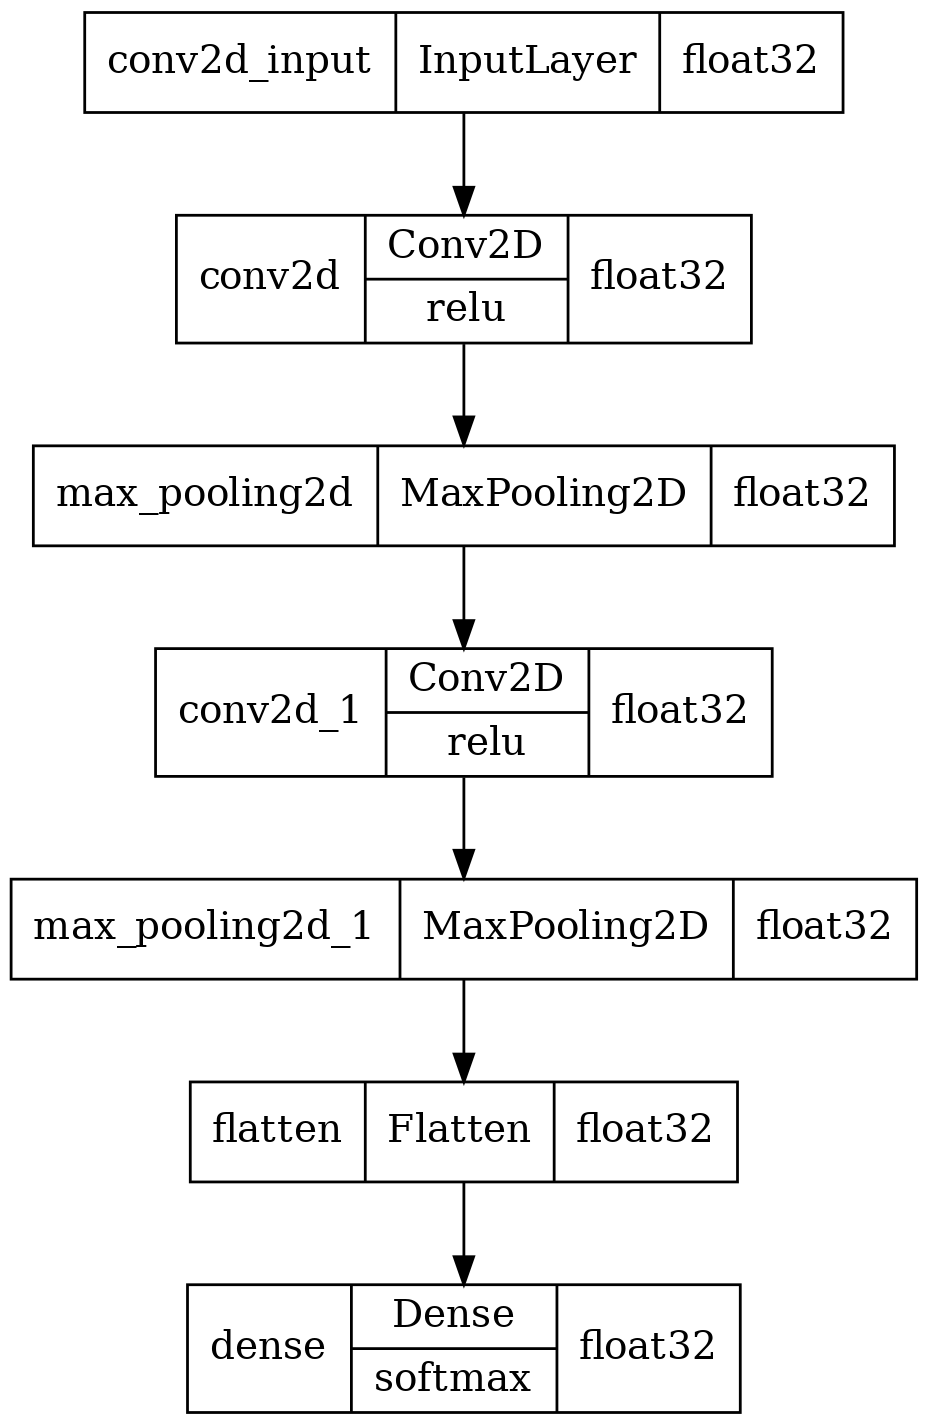

In [23]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, dpi=200)

### Compile model

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,epochs=10,batch_size=10)

Epoch 1/10


2023-12-27 11:55:32.673090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - 11s 61ms/step - loss: 1.9346 - accuracy: 0.3104
Epoch 2/10
157/157 [==============================] - 10s 62ms/step - loss: 1.6488 - accuracy: 0.4334
Epoch 3/10
157/157 [==============================] - 10s 62ms/step - loss: 1.5472 - accuracy: 0.4670
Epoch 4/10
102/157 [==================>...........] - ETA: 3s - loss: 1.4748 - accuracy: 0.4969